In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import warnings
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1_l2

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ігнорування попереджень
import warnings
warnings.simplefilter('ignore', UserWarning)

# Завантаження даних Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [6]:
# Перемішування даних
indices = np.random.permutation(len(x_train))
x_train = x_train[indices]
y_train = y_train[indices]

# Попередня обробка даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Зміна форми даних для CNN
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)

x_train.shape (60000, 28, 28, 1)
x_test.shape (10000, 28, 28, 1)


Epoch 1/50
938/938 - 47s - 50ms/step - accuracy: 0.8587 - loss: 0.3927 - val_accuracy: 0.8815 - val_loss: 0.3295 - learning_rate: 0.0050
Epoch 2/50
938/938 - 45s - 48ms/step - accuracy: 0.8887 - loss: 0.3072 - val_accuracy: 0.8912 - val_loss: 0.3056 - learning_rate: 0.0050
Epoch 3/50
938/938 - 45s - 48ms/step - accuracy: 0.9004 - loss: 0.2736 - val_accuracy: 0.9031 - val_loss: 0.2616 - learning_rate: 0.0050
Epoch 4/50
938/938 - 45s - 48ms/step - accuracy: 0.9111 - loss: 0.2418 - val_accuracy: 0.8945 - val_loss: 0.3148 - learning_rate: 0.0050
Epoch 5/50
938/938 - 44s - 47ms/step - accuracy: 0.9161 - loss: 0.2274 - val_accuracy: 0.8998 - val_loss: 0.2810 - learning_rate: 0.0050
Epoch 6/50
938/938 - 43s - 46ms/step - accuracy: 0.9196 - loss: 0.2149 - val_accuracy: 0.9048 - val_loss: 0.2737 - learning_rate: 0.0050
Epoch 7/50
938/938 - 41s - 44ms/step - accuracy: 0.9349 - loss: 0.1761 - val_accuracy: 0.9151 - val_loss: 0.2479 - learning_rate: 0.0025
Epoch 8/50
938/938 - 41s - 44ms/step - ac

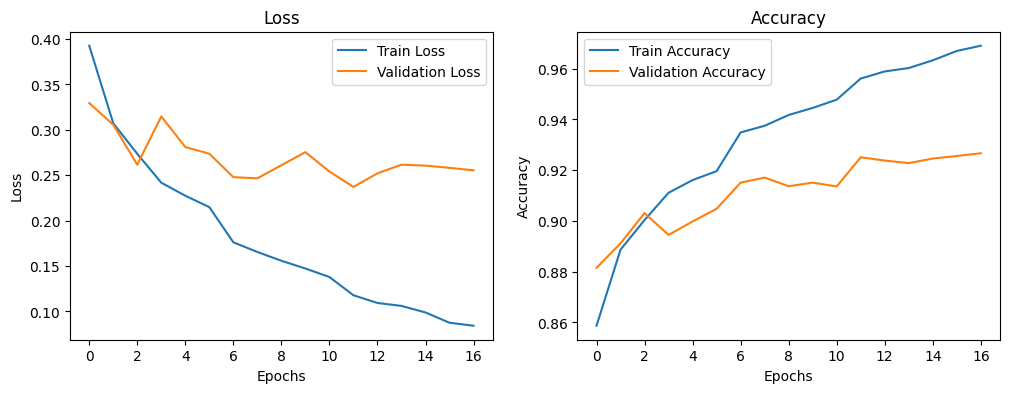

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.89      0.88      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.86      0.88      1000
       Dress       0.91      0.94      0.92      1000
        Coat       0.88      0.88      0.88      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.78      0.79      0.78      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [7]:
# One-hot encoding міток
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Створення моделі
model = Sequential([
    # Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1_l2(0.01), input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Колбеки для ранньої зупинки і зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Навчання моделі
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)


    
# Оцінка моделі на тестових даних
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Побудова графіків втрат та точності
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

plot_history(history)

# Прогнозування на тестових даних
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Класифікаційний звіт
print(classification_report(y_true, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]))

93% - це найвищий результат, якого досяг за 5 днів безкінечних експериментів. Експерименти включали: 
1) Додавання 4-х конверсійних шарів - поганий результат;
2) Додавання в модель регуляризаторів - L1, L2, L1-L2 - результат найгірший;
3) Перемішування (аугментація даних з використанням ImageDataGenerator) - значно погіршило результати точності
4) Використання інших оптимізаторів (RMSprop, Nadam, AMSGrad та інш) - показали низькі результати
5) Використання високорівневої бібліотеки глибокого навчання Keras для створення архітектури моделі не принесли біль високих результатів точності
6) Варіації з кількістю епох вплинуло тільки на час розрахунку